In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os
print(os.getcwd())

data_dir = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Dataset'

Name = os.listdir(data_dir)
print(Name)
print(len(Name))
NameLabels = ['Control', 'Stroke']
print(NameLabels)
print(len(NameLabels))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project
['.DS_Store', 'Stroke', 'Control']
3
['Control', 'Stroke']
2


In [3]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input = tf.keras.applications.resnet.preprocess_input

# Rescaling the input image
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=preprocess_input
)

validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [5]:
for image, label in train_generator:
      print(type(image))
      print(label)
      print(label[0])   # one-hot label
      print(NameLabels[np.argmax(label[0])])  # text label
      # print(NameLabels[np.argmax(label)])  # text label
      print(image[0].shape)
      break

<class 'numpy.ndarray'>
[1. 1. 0. 0. 1. 1.]
1.0
Control
(255, 255, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.10612156].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.074270606].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.24681963].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.027690185].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.15318039].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4497255..0.14141569].


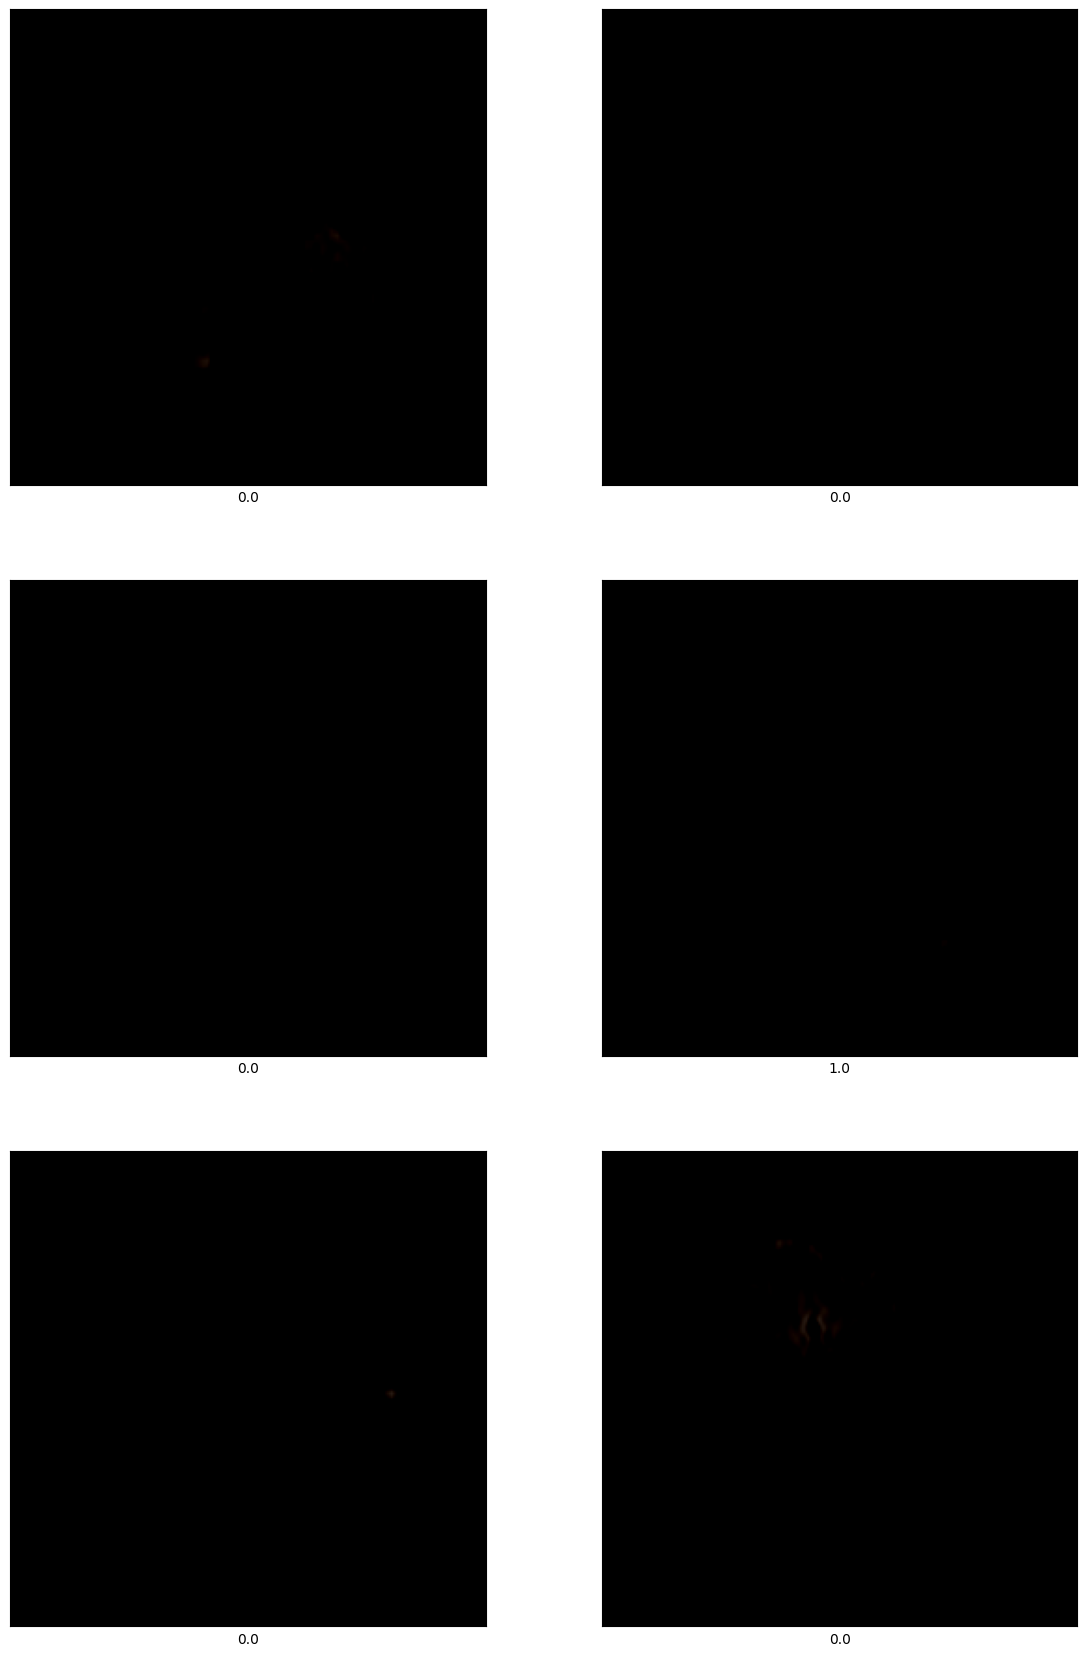

In [47]:
# browse some images
f = plt.figure(figsize=(14, 21))
for p in range(6):
    for image, label in train_generator:
        f.add_subplot(3,2,p+1)
        plt.imshow(image[p])
        # plt.title(NameLabels[np.argmax(label[p])])
        plt.xlabel(label[p], fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        break
plt.show()

# MODEL 0

simple CNN

In [48]:
model = tf.keras.Sequential()
# layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 255x255 with three layers for colors
model.add(layers.MaxPooling2D((2, 2)))
# layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
# layer 4
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
# layer 5
model.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.build()

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    14,745,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,802,049 (56.47 MB)

 Trainable params: 14,802,049 (56.47 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    optimizer = RMSprop(learning_rate=0.001), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 38s 112ms/step - binary_accuracy: 0.6245 - loss: 0.7205 - val_binary_accuracy: 0.5761 - val_loss: 0.6549
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 38s 111ms/step - binary_accuracy: 0.8057 - loss: 0.4839 - val_binary_accuracy: 0.6958 - val_loss: 0.6222
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 37s 110ms/step - binary_accuracy: 0.8517 - loss: 0.3724 - val_binary_accuracy: 0.4988 - val_loss: 15.6889
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 57s 170ms/step - binary_accuracy: 0.8957 - loss: 0.2881 - val_binary_accuracy: 0.5137 - val_loss: 5.6974
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 59s 174ms/step - binary_accuracy: 0.9299 - loss: 0.2004 - val_binary_accuracy: 0.4963 - val_loss: 19.8085
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 58s 173ms/step - binary_accuracy: 0.9533 - loss: 0.1360 - val_binary_accuracy: 0.6708 - val_loss: 8.8057
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 58s 173ms/step - binary_accuracy: 0.9632 - loss: 0.1144 - val_binary_accuracy: 0.5037 - val_loss: 5

In [15]:
def plot_loss_accuracy(history, title):
  fig = plt.figure(figsize=(13, 6))
  plt.suptitle(f"Binary classifier, stroke detection based on  MRI images\n\n {title}", fontsize=14)
  ax1 = fig.add_subplot(1,2,1)
  plt.plot(history.history['binary_accuracy'], 'r', label='Training accuracy')
  plt.plot(history.history['val_binary_accuracy'], 'purple', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend(fontsize=12, loc=4)
  plt.grid(True, alpha=0.5)

  ax2 = fig.add_subplot(1,2,2)
  plt.plot(history.history['loss'], 'g', label='Training loss')
  plt.plot(history.history['val_loss'], 'b', label='Validation loss')
  plt.title('Training and validation loss', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  handles, labels = plt.gca().get_legend_handles_labels()
  order = [1, 0]
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12, loc=4) 
  plt.legend(fontsize=14, loc=7)
  plt.grid(True, alpha=0.4)
  plt.tight_layout()
  plt.show()

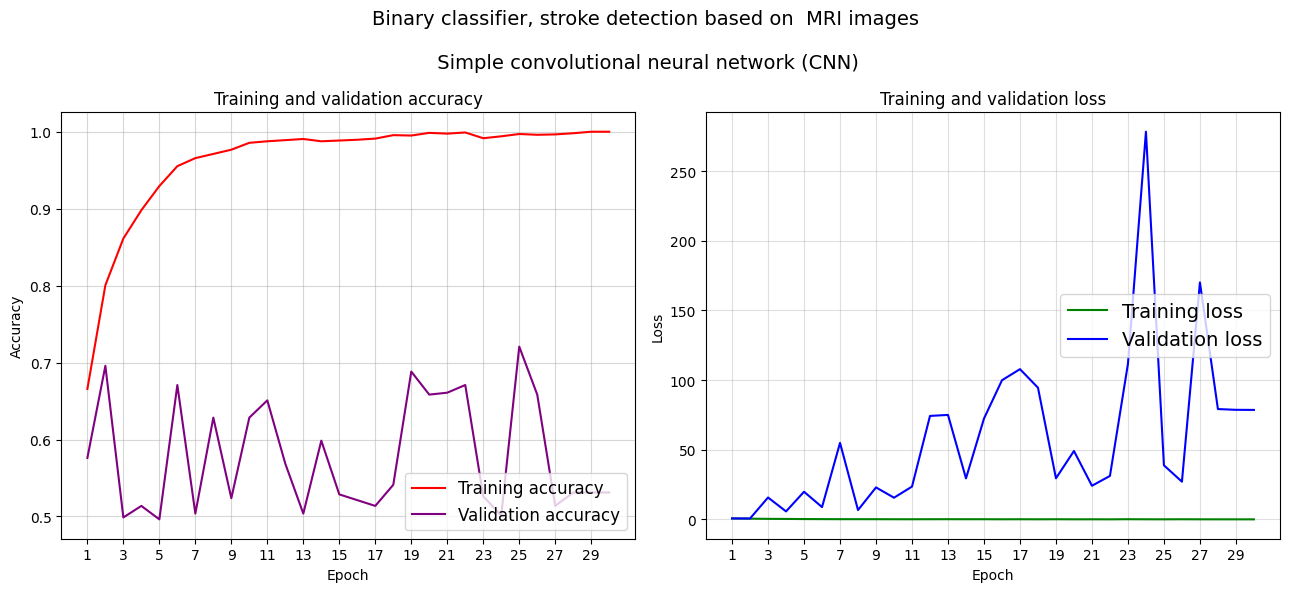

In [53]:
plot_loss_accuracy(history, "Simple convolutional neural network (CNN)")

the model quickly overfit. 

validation accuracy is in broad strokes only slightly better than random chance

# MODEL 1

#### updated simple CNN - model1

the updated simple CNN model is bigger, has an extra layer, more neurons, L2 regularization and dropout added and smaller learning rate

In [54]:
model1 = tf.keras.Sequential()
# layer 1
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 255x255 with three layers for colors
model1.add(layers.MaxPooling2D((2, 2)))
# layer 2
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 3
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 4
model1.add(layers.Conv2D(512, (3, 3), activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
# layer 5
model1.add(layers.Dense(1024, activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(Dropout(0.5))
# layer 6
model1.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 253, 253, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,626,948 (795.85 MB)

 Trainable params: 104,313,473 (397.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,313,475 (397.92 MB)

In [55]:
model1.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history1 = model1.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - binary_accuracy: 0.5200 - loss: 22.3579 - val_binary_accuracy: 0.4988 - val_loss: 17.2618
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 333s 994ms/step - binary_accuracy: 0.6089 - loss: 15.6753 - val_binary_accuracy: 0.4988 - val_loss: 15.0533
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 322s 961ms/step - binary_accuracy: 0.6470 - loss: 11.0840 - val_binary_accuracy: 0.4988 - val_loss: 14.7284
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 322s 960ms/step - binary_accuracy: 0.6703 - loss: 7.9358 - val_binary_accuracy: 0.4988 - val_loss: 14.4750
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 322s 960ms/step - binary_accuracy: 0.6984 - loss: 5.7576 - val_binary_accuracy: 0.4988 - val_loss: 14.9037
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 323s 961ms/step - binary_accuracy: 0.7209 - loss: 4.2551 - val_binary_accuracy: 0.4988 - val_loss: 13.5882
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 324s 966ms/step - binary_accuracy: 0.7075 - loss: 3.2332 - val_binary_accuracy

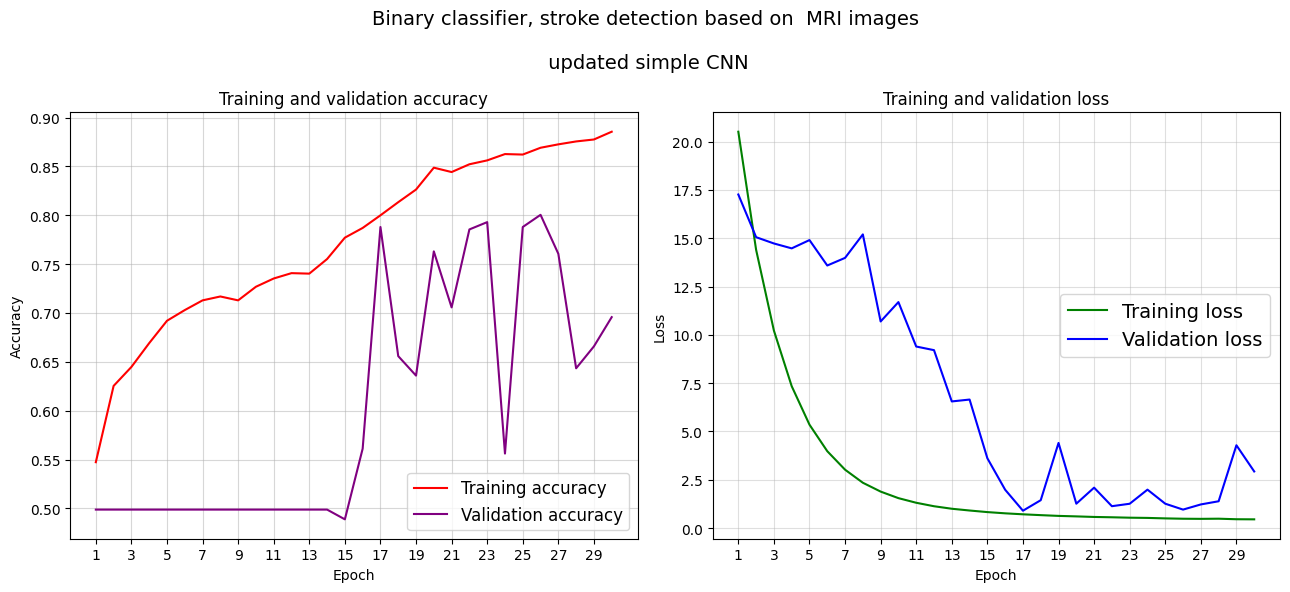

In [56]:
plot_loss_accuracy(history1, "updated simple CNN")

model1 did not overfit as fast as the original model, but the improvement was minor

# PRETRAINED MODELS

I explored four different pretrained models - VGG19, ResNet50, InceptionV3, EfficientNetB0 - and created two versions of each, while keepin the rest of the parameters same:
1. with all layers frozen and 
1. with 3 unfrozen layers

# MODEL 2

#### pretrained model VGG19 (Visual Geometry Group), all layers frozen, model2

In [57]:
# instantiating VGG19 convolutional base
pre_trained_model2 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model2.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
pre_trained_model2.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 255, 255, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 255, 255, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 127, 127, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 127, 127, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 63, 63, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [58]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model2.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [59]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [60]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(pre_trained_model2.input, x) 

# Print the model summary
model2.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 255, 255, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 255, 255, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 127, 127, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 127, 127, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 63, 63, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7, 7, 1024)     │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             

 Total params: 20,550,721 (78.39 MB)

 Trainable params: 526,337 (2.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [61]:
model2.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model2.keras",
        save_best_only=True,
        monitor="val_loss")
]

history2 = model2.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - binary_accuracy: 0.5038 - loss: 0.6965 - val_binary_accuracy: 0.5062 - val_loss: 0.6931
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - binary_accuracy: 0.6197 - loss: 0.6695 - val_binary_accuracy: 0.5786 - val_loss: 0.6906
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - binary_accuracy: 0.6274 - loss: 0.6630 - val_binary_accuracy: 0.5736 - val_loss: 0.6901
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - binary_accuracy: 0.6101 - loss: 0.6527 - val_binary_accuracy: 0.5461 - val_loss: 0.6925
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - binary_accuracy: 0.6316 - loss: 0.6425 - val_binary_accuracy: 0.5387 - val_loss: 0.6963
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - binary_accuracy: 0.6236 - loss: 0.6445 - val_binary_accuracy: 0.5860 - val_loss: 0.6911
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - binary_accuracy: 0.6361 - loss: 0.6375 - val_binary_accuracy: 0.5810 - val_loss: 0.6913

In [ ]:
#the best model2
best_pretrained2 = keras.models.load_model("model2.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

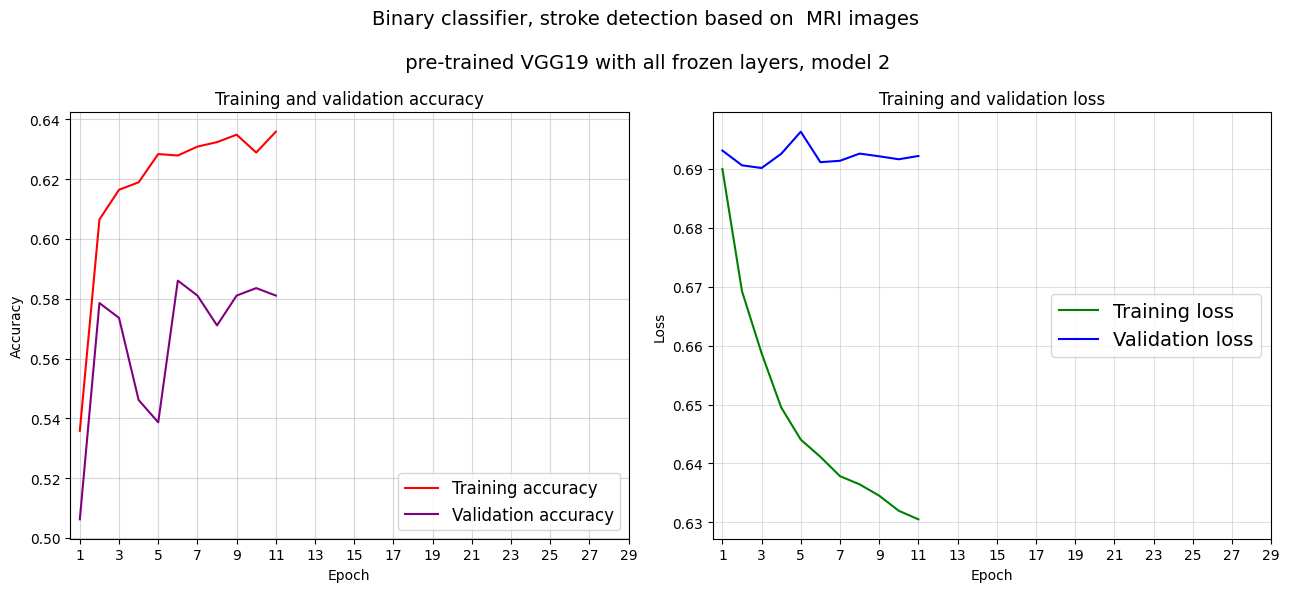

In [62]:
plot_loss_accuracy(history2, "pre-trained VGG19 with all frozen layers, model 2")

outcome of model2 was worse than the baseline

# MODEL 3

#### pretrained model VGG19 (Visual Geometry Group), 16 frozen and 3 unfrozen layers, model3

changed optimizer back to RMSprop

In [63]:
# instantiating VGG19 convolutional base
pre_trained_model3 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the first 16 layers, leave last 3 trainable
pre_trained_model3.trainable = True
for layer in pre_trained_model3.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
pre_trained_model3.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 255, 255, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 255, 255, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 127, 127, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 127, 127, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 63, 63, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

In [64]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model3.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [65]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [66]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model3 = Model(pre_trained_model3.input, x) 

# Print the model summary. See your dense network connected at the end.
model3.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 255, 255, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 255, 255, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 127, 127, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 127, 127, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 63, 63, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7, 7, 1024)     │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             

 Total params: 20,550,721 (78.39 MB)

 Trainable params: 7,605,761 (29.01 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

In [67]:
model3.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model3.keras",
        save_best_only=True,
        monitor="val_loss")
]

history3 = model3.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - binary_accuracy: 0.5996 - loss: 0.6592 - val_binary_accuracy: 0.5960 - val_loss: 0.6757
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - binary_accuracy: 0.6724 - loss: 0.6052 - val_binary_accuracy: 0.6608 - val_loss: 0.6362
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - binary_accuracy: 0.7254 - loss: 0.5427 - val_binary_accuracy: 0.6733 - val_loss: 0.6095
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - binary_accuracy: 0.7515 - loss: 0.5155 - val_binary_accuracy: 0.7132 - val_loss: 0.5725
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - binary_accuracy: 0.7625 - loss: 0.4770 - val_binary_accuracy: 0.7656 - val_loss: 0.5250
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 548s 2s/step - binary_accuracy: 0.7722 - loss: 0.4642 - val_binary_accuracy: 0.7681 - val_loss: 0.4958
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - binary_accuracy: 0.7983 - loss: 0.4291 - val_binary_accuracy: 0.8204 - val_loss: 0.4604

In [ ]:
#the best model3
best_pretrained2 = keras.models.load_model("model3.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

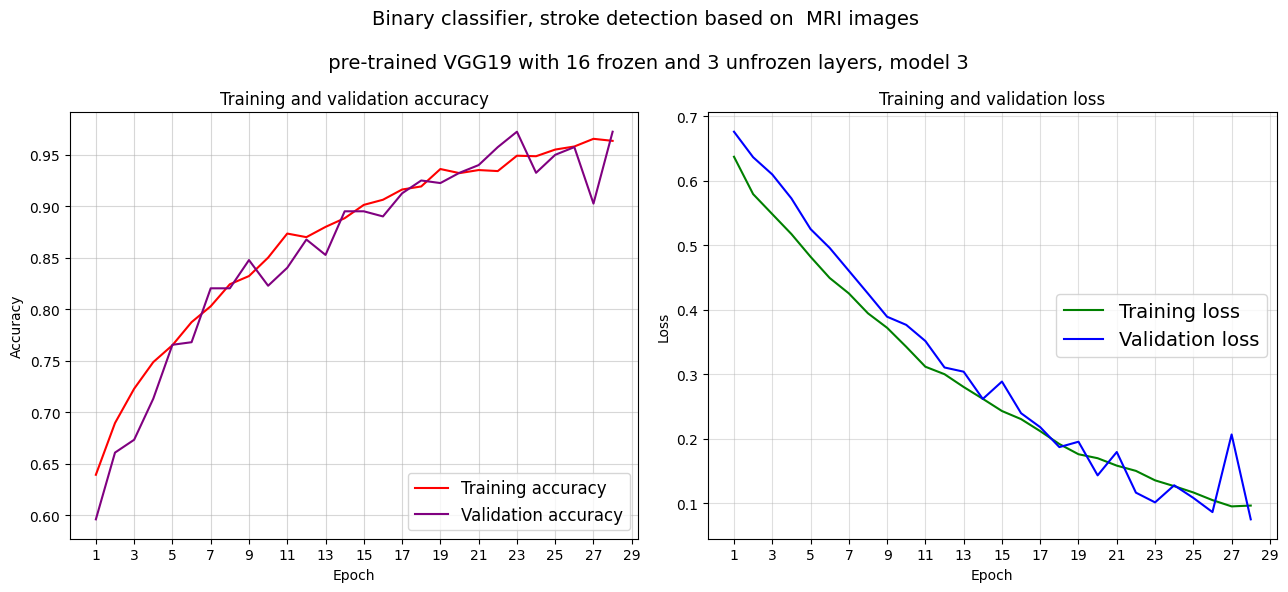

In [68]:
plot_loss_accuracy(history3, "pre-trained VGG19 with 16 frozen and 3 unfrozen layers, model 3")

model 3 outcome was a big improvement over previous models. improvement may continue if there were more epochs.

# MODEL 4

#### pretrained model: ResNet50, all frozen layers, model4

In [69]:
# instantiating ResNet50 convolutional base
pre_trained_model4 = keras.applications.ResNet50(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model4.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
pre_trained_model4.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 261, 261,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [70]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model4.get_layer('conv5_block3_out') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [71]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [72]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model4 = Model(pre_trained_model4.input, x) 

# Print the model summary. See your dense network connected at the end.
model4.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 261, 261,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [73]:
model4.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model4.keras",
        save_best_only=True,
        monitor="val_loss")
]

history4 = model4.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 175s 512ms/step - binary_accuracy: 0.4802 - loss: 0.7040 - val_binary_accuracy: 0.5012 - val_loss: 0.6950
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 170s 507ms/step - binary_accuracy: 0.5076 - loss: 0.6916 - val_binary_accuracy: 0.4988 - val_loss: 0.6963
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 173s 516ms/step - binary_accuracy: 0.5118 - loss: 0.6879 - val_binary_accuracy: 0.4988 - val_loss: 0.6914
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 179s 534ms/step - binary_accuracy: 0.5530 - loss: 0.6860 - val_binary_accuracy: 0.4988 - val_loss: 0.6905
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 180s 536ms/step - binary_accuracy: 0.5633 - loss: 0.6823 - val_binary_accuracy: 0.5611 - val_loss: 0.6887
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 179s 534ms/step - binary_accuracy: 0.5731 - loss: 0.6770 - val_binary_accuracy: 0.5187 - val_loss: 0.6885
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 180s 535ms/step - binary_accuracy: 0.5853 - loss: 0.6742 - val_binary_accuracy: 0.52

In [ ]:
#the best model4
best_pretrained2 = keras.models.load_model("model4.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

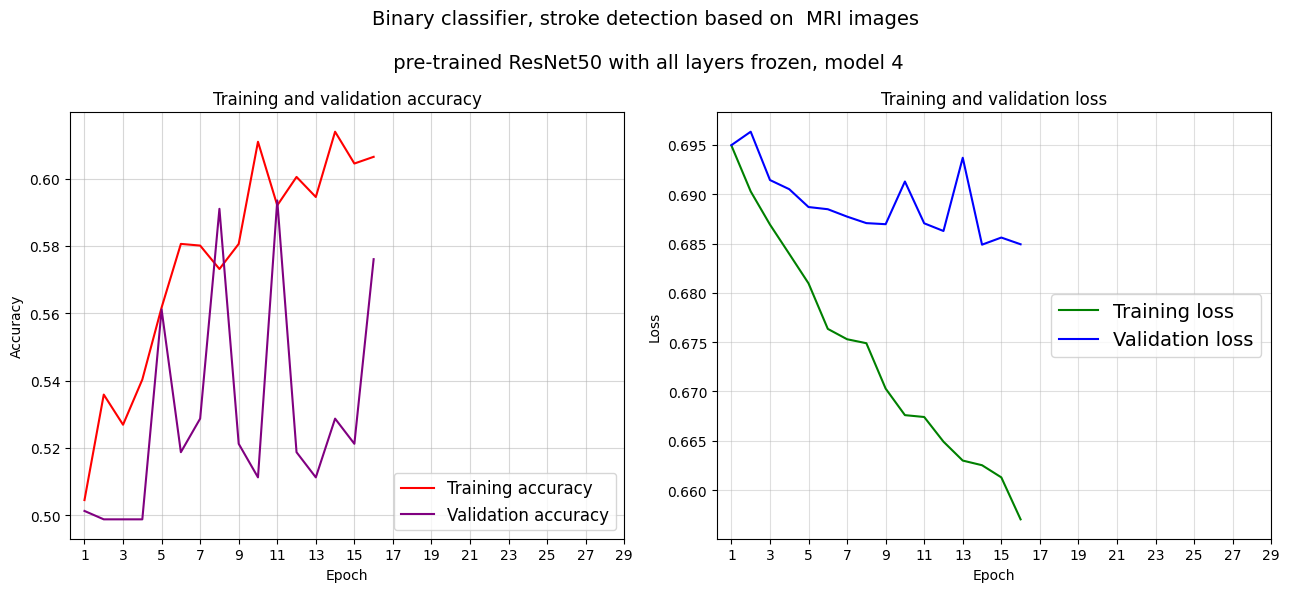

In [74]:
plot_loss_accuracy(history4, "pre-trained ResNet50 with all layers frozen, model 4")

model4 outcome was worse than baseline model0, no better than random chance

# MODEL 5

#### pretrained model: ResNet50, 3 unfrozen layers, model5

In [75]:
# instantiating ResNet50 convolutional base
pre_trained_model5 = keras.applications.ResNet50(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model5.trainable = True
for layer in pre_trained_model5.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
pre_trained_model5.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 261, 261,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 1,054,720 (4.02 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

In [76]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model5.get_layer('conv5_block3_out')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [77]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [78]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model5 = Model(pre_trained_model5.input, x) 

# Print the model summary. See your dense network connected at the end.
model5.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 261, 261,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 3,153,921 (12.03 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

In [79]:
model5.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model5.keras",
        save_best_only=True,
        monitor="val_loss")
]

history5 = model5.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 189s 553ms/step - binary_accuracy: 0.5240 - loss: 0.6974 - val_binary_accuracy: 0.5162 - val_loss: 0.6893
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 154s 457ms/step - binary_accuracy: 0.5943 - loss: 0.6615 - val_binary_accuracy: 0.5362 - val_loss: 0.6825
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 187s 558ms/step - binary_accuracy: 0.6189 - loss: 0.6423 - val_binary_accuracy: 0.5337 - val_loss: 0.6873
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 187s 556ms/step - binary_accuracy: 0.6280 - loss: 0.6480 - val_binary_accuracy: 0.5860 - val_loss: 0.6868
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 190s 565ms/step - binary_accuracy: 0.6415 - loss: 0.6376 - val_binary_accuracy: 0.5411 - val_loss: 0.6882
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 188s 559ms/step - binary_accuracy: 0.6234 - loss: 0.6381 - val_binary_accuracy: 0.5786 - val_loss: 0.6819
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 191s 568ms/step - binary_accuracy: 0.6101 - loss: 0.6533 - val_binary_accuracy: 0.59

In [ ]:
#the best model5
best_pretrained2 = keras.models.load_model("model5.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

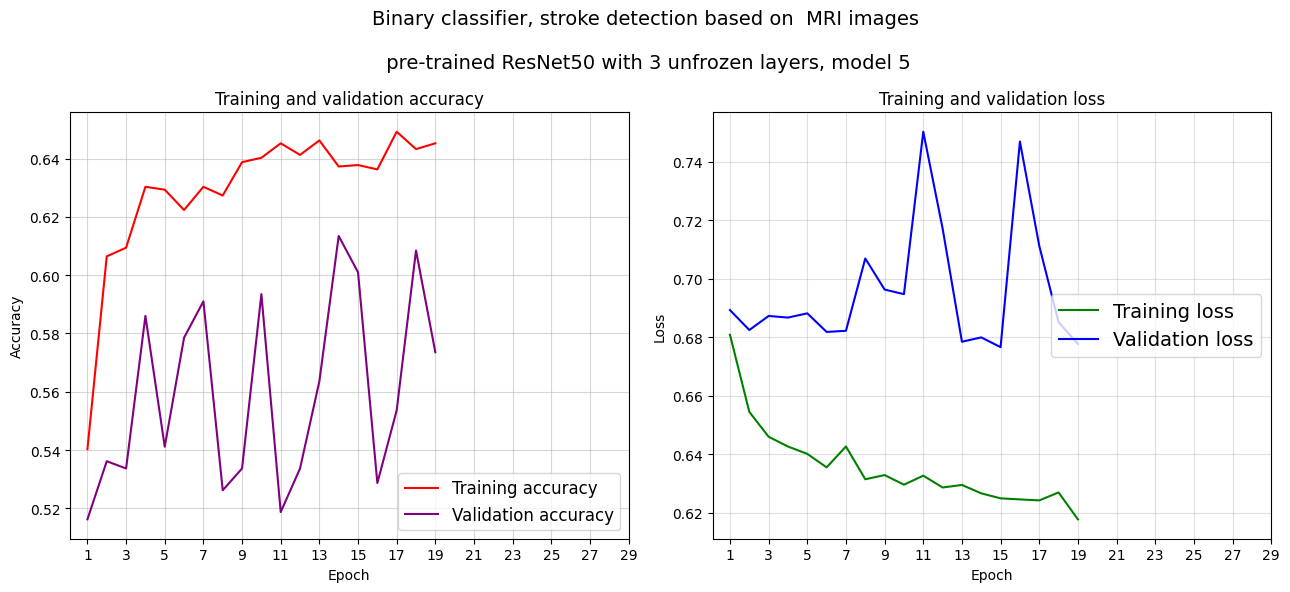

In [80]:
plot_loss_accuracy(history5, "pre-trained ResNet50 with 3 unfrozen layers, model 5")

model 5 performed worse than baseline

# MODEL 6

#### pretrained model: InceptionV3, all frozen layers, model6

In [81]:
# instantiating InceptionV3 convolutional base
pre_trained_model6 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model6.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
pre_trained_model6.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 62, 62,    │      5,120 │ max_pooling2d_6[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [82]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model6.get_layer('mixed10')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [83]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [84]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model6 = Model(pre_trained_model6.input, x) 

# Print the model summary. See your dense network connected at the end.
model6.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 62, 62,    │      5,120 │ max_pooling2d_6[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 23,901,985 (91.18 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [85]:
# Inceptionv3 preproces_input will scale input pixels between -1 and 1, 

preprocess_input_inc = tf.keras.applications.inception_v3.preprocess_input

# Rescaling the input image and Data Augmentation
train_datagen_inc = ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=preprocess_input_inc
)

validation_datagen_inc = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator_inc = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_inc = validation_datagen_inc.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [86]:
model6.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model6.keras",
        save_best_only=True,
        monitor="val_loss")
]

history6 = model6.fit(
    train_generator_inc,
    epochs=30,
    validation_data=validation_generator_inc,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 76s 218ms/step - binary_accuracy: 0.6452 - loss: 0.6205 - val_binary_accuracy: 0.6858 - val_loss: 0.5892
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 73s 217ms/step - binary_accuracy: 0.7728 - loss: 0.4989 - val_binary_accuracy: 0.7257 - val_loss: 0.5441
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 73s 217ms/step - binary_accuracy: 0.7977 - loss: 0.4424 - val_binary_accuracy: 0.7431 - val_loss: 0.5058
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 73s 216ms/step - binary_accuracy: 0.8195 - loss: 0.4150 - val_binary_accuracy: 0.7880 - val_loss: 0.4747
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 75s 222ms/step - binary_accuracy: 0.8412 - loss: 0.3917 - val_binary_accuracy: 0.7830 - val_loss: 0.4708
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 76s 226ms/step - binary_accuracy: 0.8379 - loss: 0.3821 - val_binary_accuracy: 0.8005 - val_loss: 0.4357
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 76s 226ms/step - binary_accuracy: 0.8564 - loss: 0.3555 - val_binary_accuracy: 0.8030 - val_loss: 0.4

In [ ]:
#the best model6
best_pretrained2 = keras.models.load_model("model6.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

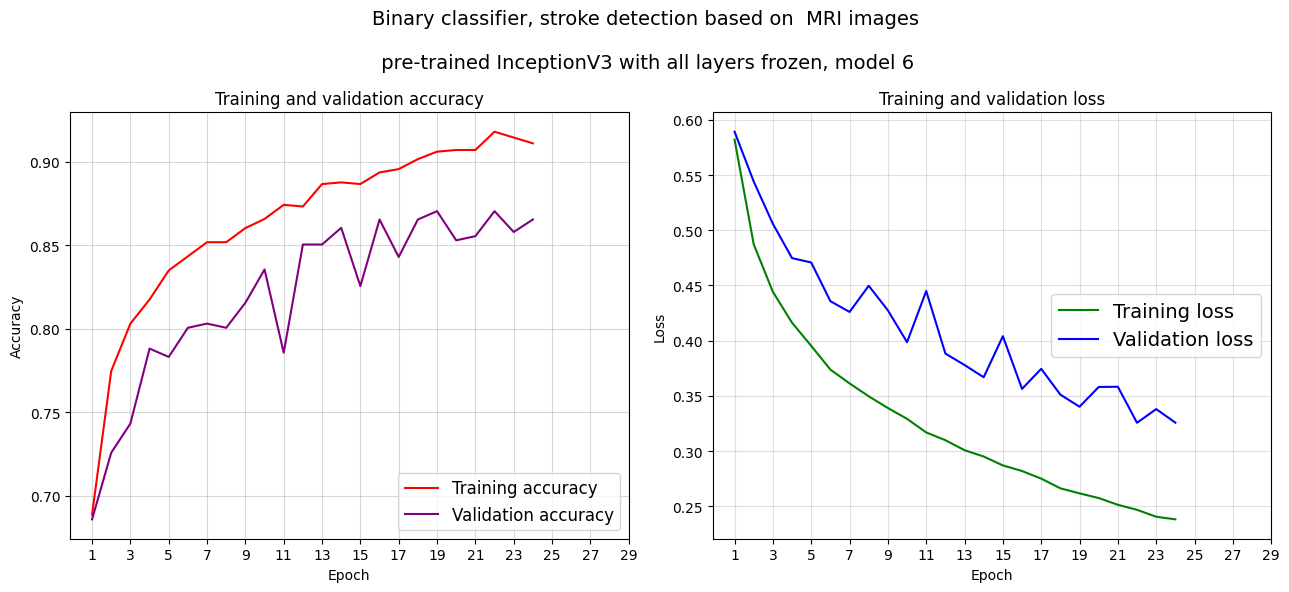

In [87]:
plot_loss_accuracy(history6, "pre-trained InceptionV3 with all layers frozen, model 6")

model 6 is an improvement over the baseline, achieving around 85% accuracy

# MODEL 7

#### pretrained model: InceptionV3, 3 unfrozen layers, model7

In [88]:
# instantiating InceptionV3 convolutional base
pre_trained_model7 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model7.trainable = True
for layer in pre_trained_model7.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
pre_trained_model7.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 127, 127,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 125, 125,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 125, 125,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 62, 62,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_104 (Conv2D) │ (None, 62, 62,    │      5,120 │ max_pooling2d_10… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_104[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_105 (Conv2D) │ (None, 60, 60,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_105[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [89]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model7.get_layer('mixed10') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [90]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [91]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model7 = Model(pre_trained_model7.input, x) 

# Print the model summary. See your dense network connected at the end.
model7.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 127, 127,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 125, 125,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 125, 125,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 62, 62,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_104 (Conv2D) │ (None, 62, 62,    │      5,120 │ max_pooling2d_10… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_104[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_105 (Conv2D) │ (None, 60, 60,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_105[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 23,901,985 (91.18 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [92]:
model7.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model7.keras",
        save_best_only=True,
        monitor="val_loss")
]

history7 = model7.fit(
    train_generator_inc,
    epochs=30,
    validation_data=validation_generator_inc,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 78s 224ms/step - binary_accuracy: 0.6122 - loss: 0.6362 - val_binary_accuracy: 0.7132 - val_loss: 0.5728
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 73s 218ms/step - binary_accuracy: 0.7800 - loss: 0.4887 - val_binary_accuracy: 0.7307 - val_loss: 0.5330
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 74s 220ms/step - binary_accuracy: 0.8048 - loss: 0.4430 - val_binary_accuracy: 0.7606 - val_loss: 0.5252
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 73s 217ms/step - binary_accuracy: 0.8060 - loss: 0.4250 - val_binary_accuracy: 0.7756 - val_loss: 0.4825
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 72s 215ms/step - binary_accuracy: 0.8424 - loss: 0.3799 - val_binary_accuracy: 0.7880 - val_loss: 0.4558
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 73s 218ms/step - binary_accuracy: 0.8417 - loss: 0.3809 - val_binary_accuracy: 0.7830 - val_loss: 0.4885
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 75s 223ms/step - binary_accuracy: 0.8460 - loss: 0.3585 - val_binary_accuracy: 0.8005 - va

In [ ]:
#the best model7
best_pretrained2 = keras.models.load_model("model7.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

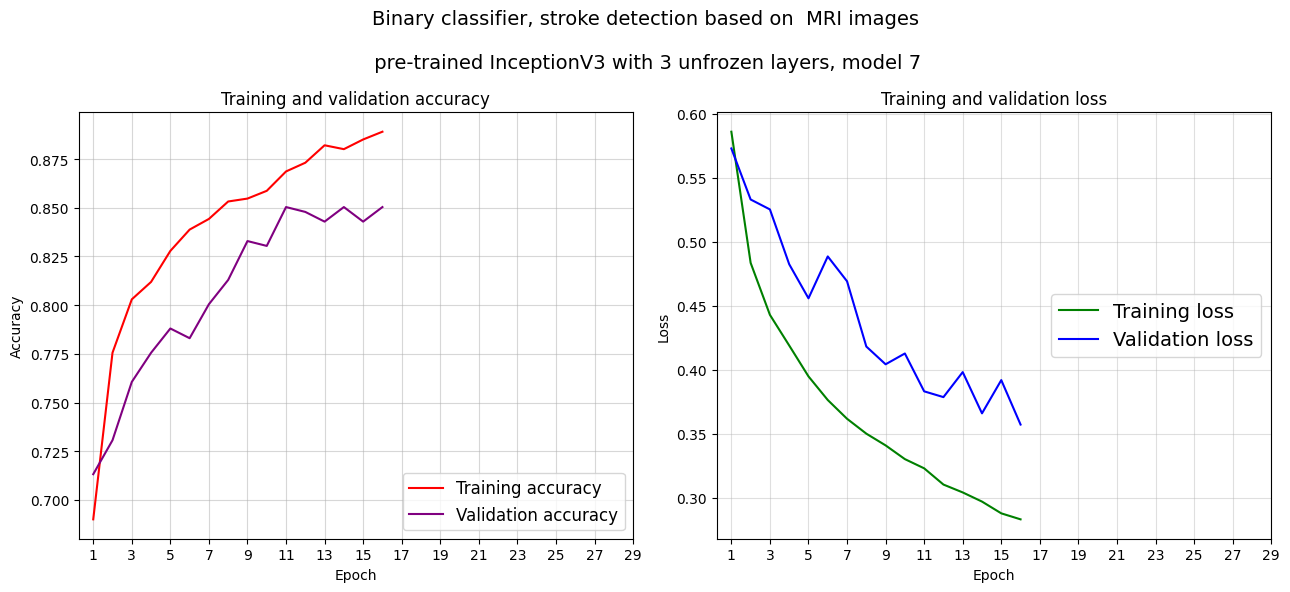

In [93]:
plot_loss_accuracy(history7, "pre-trained InceptionV3 with 3 unfrozen layers, model 7")

model7 is very similar to model 6, improvement over baseline. training last 3 layers does not seem to add

# MODEL 8

#### pretrained model: EfficientNetB0, all frozen layers, model8

In [26]:
# instantiating EfficientNetB0 convolutional base
pre_trained_model8 = keras.applications.EfficientNetB0(
    # input_shape = (255, 255, 3),
    input_shape = (224, 224, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model8.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model8.summary()

In [27]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model8.get_layer('top_activation')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [28]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
# x = layers.GlobalAveragePooling2D()(x)

In [29]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model8 = Model(pre_trained_model8.input, x) 

# Print the model summary. See your dense network connected at the end.
# model8.summary()

In [47]:
# from PIL import Image                                              
# import os, sys                       

# path = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Resize /Stroke/'
# dirs = os.listdir( path )                                      

# def resize(width, height):
# 	for item in dirs:
# 		if item == '.DS_Store':
# 			continue
# 		if os.path.isfile(path + item):
# 			img = Image.open(path + item)
# 			new_image = img.resize((width, height))
# 			new_file_name = 'resized-' + item
# 			new_image.save(path + new_file_name)

# resize(224, 224)

In [30]:
resized_data = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Resize '

In [31]:
# EfficientNet preprocess_input is a pass-through function. 
# EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range

preprocess_input_en = tf.keras.applications.efficientnet.preprocess_input

# Rescaling the input image and Data Augmentation
train_datagen_en = ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=preprocess_input_en
)

validation_datagen_en = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator_en = train_datagen_en.flow_from_directory(
    resized_data,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_en = validation_datagen_en.flow_from_directory(
    resized_data,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [32]:
model8.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model8.keras",
        save_best_only=True,
        monitor="val_loss")
]

history8 = model8.fit(
    train_generator_en,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 240s 675ms/step - binary_accuracy: 0.4495 - loss: 0.9043 - val_binary_accuracy: 0.4988 - val_loss: 0.6949
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 234s 698ms/step - binary_accuracy: 0.5068 - loss: 0.7598 - val_binary_accuracy: 0.5012 - val_loss: 0.7400
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 226s 673ms/step - binary_accuracy: 0.5217 - loss: 0.7312 - val_binary_accuracy: 0.5012 - val_loss: 0.7186
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 214s 638ms/step - binary_accuracy: 0.5155 - loss: 0.7153 - val_binary_accuracy: 0.4988 - val_loss: 0.6941
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 209s 624ms/step - binary_accuracy: 0.4900 - loss: 0.7107 - val_binary_accuracy: 0.4988 - val_loss: 0.7091
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 224s 670ms/step - binary_accuracy: 0.4899 - loss: 0.7028 - val_binary_accuracy: 0.5012 - val_loss: 0.6932
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 184s 550ms/step - binary_accuracy: 0.5209 - loss: 0.6967 - val_binary_accuracy: 0.4988 - val_lo

In [34]:
#the best model8
best_pretrained2 = keras.models.load_model("model8.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator_en) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - binary_accuracy: 0.4585 - loss: 0.7002
Validation accuracy: 0.499


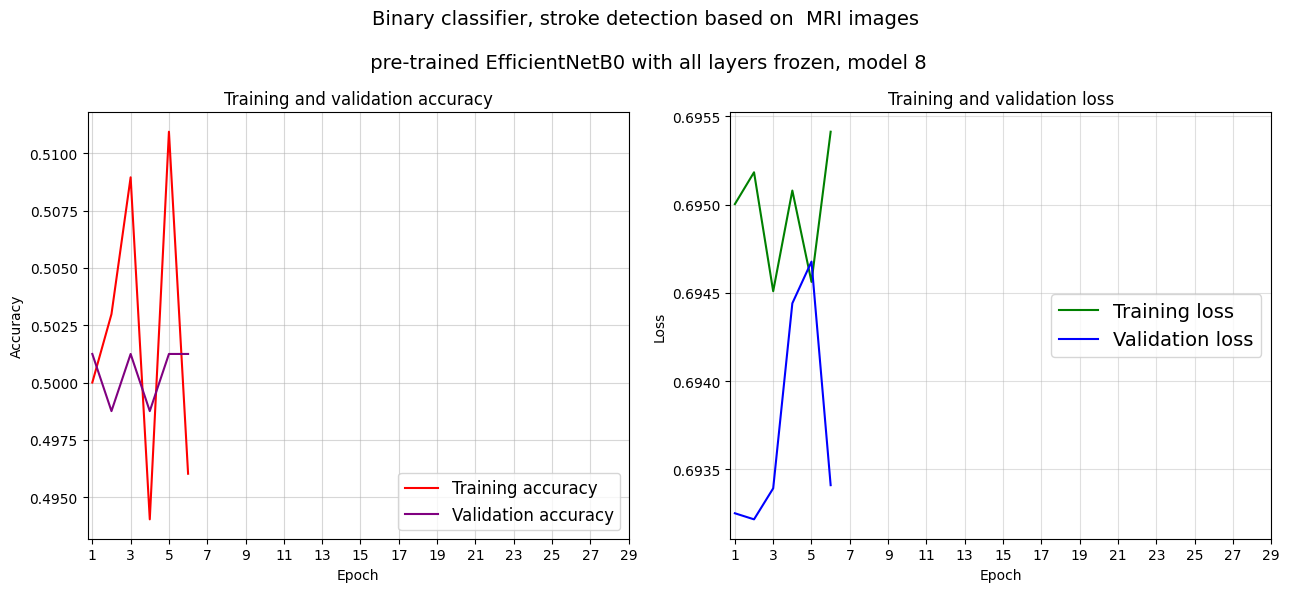

In [ ]:
plot_loss_accuracy(history8, "pre-trained EfficientNetB0 with all layers frozen, model 8")

# MODEL 8 OUTCOME

# MODEL 9

#### pretrained model: EfficientNetB0, 3 unfrozen layers, model9

In [5]:
# instantiating EfficientNetB0 convolutional base
pre_trained_model9 = keras.applications.EfficientNetB0(
    input_shape = (224, 224, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model9.trainable = True
for layer in pre_trained_model9.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model9.summary()

In [7]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model9.get_layer('top_activation') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 1280)


In [8]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [9]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model9 = Model(pre_trained_model9.input, x) 

# Print the model summary. See your dense network connected at the end.
# model9.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 255, 255,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 255, 255,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 255, 255,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 5,362,340 (20.46 MB)

 Trainable params: 1,725,569 (6.58 MB)

 Non-trainable params: 3,636,771 (13.87 MB)

In [12]:
model9.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model9.keras",
        save_best_only=True,
        monitor="val_loss")
]

history9 = model9.fit(
    train_generator_en,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 221s 620ms/step - binary_accuracy: 0.5132 - loss: 0.6970 - val_binary_accuracy: 0.4988 - val_loss: 0.6932
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 209s 621ms/step - binary_accuracy: 0.4999 - loss: 0.6989 - val_binary_accuracy: 0.4988 - val_loss: 0.6933
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 205s 610ms/step - binary_accuracy: 0.5128 - loss: 0.6961 - val_binary_accuracy: 0.5012 - val_loss: 0.6961
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 218s 650ms/step - binary_accuracy: 0.4856 - loss: 0.6999 - val_binary_accuracy: 0.5012 - val_loss: 0.6935
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 201s 597ms/step - binary_accuracy: 0.5003 - loss: 0.6957 - val_binary_accuracy: 0.4988 - val_loss: 0.6938
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 193s 575ms/step - binary_accuracy: 0.5046 - loss: 0.6970 - val_binary_accuracy: 0.5012 - val_loss: 0.7076
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 192s 570ms/step - binary_accuracy: 0.4740 - loss: 0.7033 - val_binary_accuracy: 0.5012 - val_lo

In [13]:
#the best model9
best_pretrained2 = keras.models.load_model("model9.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 347ms/step - binary_accuracy: 0.5024 - loss: 0.8156
Validation accuracy: 0.499


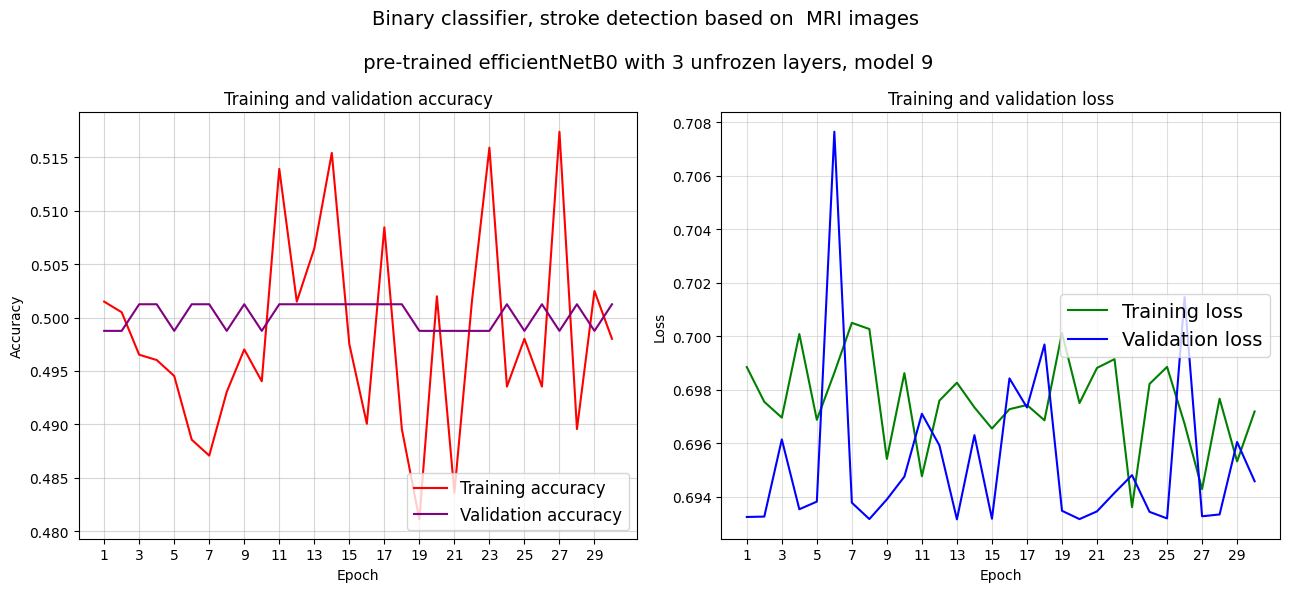

In [16]:
plot_loss_accuracy(history9, "pre-trained efficientNetB0 with 3 unfrozen layers, model 9")

# MODEL 9 OUTCOME